# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [4]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [5]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [6]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [8]:
# Your code here :

from sklearn.model_selection import train_test_split

# Define the feature columns (all columns except 'MEDV')
X = data.drop('MEDV', axis=1)

# Define the target variable ('MEDV')
y = data['MEDV']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets with labels
print(f"Training Features (X_train): {X_train.shape}")
print(f"Testing Features (X_test): {X_test.shape}")
print(f"Training Target (y_train): {y_train.shape}")
print(f"Testing Target (y_test): {y_test.shape}")



Training Features (X_train): (404, 13)
Testing Features (X_test): (102, 13)
Training Target (y_train): (404,)
Testing Target (y_test): (102,)


### Data Split

The dataset has been successfully split into training and testing sets, with the following shapes:

- **Training Features (X_train)**: `(404, 13)`  
  This represents 404 rows of training data with 13 feature columns (i.e., all the variables except `MEDV`).

- **Testing Features (X_test)**: `(102, 13)`  
  This represents 102 rows of testing data with 13 feature columns.

- **Training Target (y_train)**: `(404,)`  
  This represents the target variable `MEDV` for the training set, consisting of 404 values.

- **Testing Target (y_test)**: `(102,)`  
  This represents the target variable `MEDV` for the testing set, consisting of 102 values.

The data is split in a way that 80% of the dataset is used for training and 20% is used for testing.


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [11]:
# Your code here :

from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Generate predictions on both the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Display the predictions for both sets
print(f"Training Set Predictions: {y_train_pred}")
print(f"Testing Set Predictions: {y_test_pred}")


Training Set Predictions: [10.96952405 19.41196567 23.06419602 12.1470648  18.3738116  25.24677946
 20.77024774 23.90932632  7.81713319 19.60988098 21.8202963  27.59615864
 32.67986504 15.12308446 35.3964561  12.99688651 20.728181   28.30223542
 15.61724836 24.45143096  4.61794591 23.76681932 25.56178249 22.98928526
 24.5213025  34.06407919 19.71166707 39.11233072 14.62515846 24.81139885
 18.02332883 20.85836445  9.57577261 20.87246835 22.28583096 31.79327155
 31.04748307 15.70611763 17.01382935 28.23332703 24.27661276 16.88670215
  6.90720745 26.75808901 22.586493   17.53664716 13.77197016 41.04840929
 16.44690754 18.23531669 25.37038646 23.64581399 22.05322581 20.83620499
 16.93508273 22.797579   29.13333934  7.69310515 24.60571452 17.2358028
 21.10846551 25.15150324 27.33394823 21.30494963 41.5811902  19.19666651
 15.37955448 19.33545877 17.04687638 22.96801532 23.11094953 33.6977586
 22.77436405 20.28968381 25.35517813 31.02479125 33.05103792 28.44712333
  8.50926331  5.61220643 12

### Predictions for Training and Testing Sets

The model has been successfully trained, and predictions have been generated for both the training and testing sets. Below are the results:

- **Training Set Predictions**: These are the predicted values for the `MEDV` target variable based on the training data. There are 404 predictions, corresponding to the 404 samples in the training set. These predictions represent the estimated median values of owner-occupied homes in $1000's.

- **Testing Set Predictions**: These are the predicted values for the `MEDV` target variable based on the testing data. There are 102 predictions, corresponding to the 102 samples in the testing set. These predictions represent the estimated median values of owner-occupied homes in $1000's for the testing set.

The model's performance will be evaluated using various metrics such as Mean Squared Error (MSE) and R-squared in the subsequent steps.


## 3. Calculate and print R-squared for both the training and the testing set.

In [14]:
# Your code here :

from sklearn.metrics import r2_score

# Calculate R-squared for both training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the R-squared values
print(f"R-squared for Training Set: {r2_train}")
print(f"R-squared for Testing Set: {r2_test}")


R-squared for Training Set: 0.7508856358979673
R-squared for Testing Set: 0.6687594935356307


### R-squared Values for Training and Testing Sets

The R-squared values for both the training and testing sets have been calculated:

- **R-squared for Training Set**: This value indicates how well the model fits the training data. An R-squared value of 0.7509 means that approximately 75.09% of the variance in the training data is explained by the model.

- **R-squared for Testing Set**: This value indicates how well the model generalizes to the testing data. An R-squared value of 0.6688 means that approximately 66.88% of the variance in the testing data is explained by the model.

The R-squared values suggest that the model performs well, but there is room for improvement, especially in generalizing to the testing set.


## 4. Calculate and print mean squared error for both the training and the testing set.

In [17]:
# Your code here :

from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error for both training and testing sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print the Mean Squared Error values
print(f"Mean Squared Error for Training Set: {mse_train}")
print(f"Mean Squared Error for Testing Set: {mse_test}")


Mean Squared Error for Training Set: 21.641412753226312
Mean Squared Error for Testing Set: 24.291119474973613


### Mean Squared Error for Training and Testing Sets

The Mean Squared Error (MSE) values for both the training and testing sets have been calculated:

- **Mean Squared Error for Training Set**: The MSE for the training set is 21.64. This value indicates the average squared difference between the predicted and actual values for the training data. A lower MSE indicates a better fit to the training data.

- **Mean Squared Error for Testing Set**: The MSE for the testing set is 24.29. This value represents the average squared difference between the predicted and actual values for the testing data. The MSE for the testing set is slightly higher than that of the training set, which suggests that the model might be overfitting to the training data.

Overall, the MSE values provide insight into the model's accuracy, with a lower MSE indicating better performance.


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [20]:
# Your code here :

from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error for both training and testing sets
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Print the Mean Absolute Error values
print(f"Mean Absolute Error for Training Set: {mae_train}")
print(f"Mean Absolute Error for Testing Set: {mae_test}")


Mean Absolute Error for Training Set: 3.314771626783227
Mean Absolute Error for Testing Set: 3.189091965887852


### Mean Absolute Error for Training and Testing Sets

The Mean Absolute Error (MAE) values for both the training and testing sets have been calculated:

- **Mean Absolute Error for Training Set**: The MAE for the training set is 3.31. This value indicates the average absolute difference between the predicted and actual values for the training data. A lower MAE indicates a better fit to the training data.

- **Mean Absolute Error for Testing Set**: The MAE for the testing set is 3.19. This value represents the average absolute difference between the predicted and actual values for the testing data. The MAE for the testing set is slightly lower than that of the training set, suggesting that the model is performing well on the testing data.

The MAE values show that the model is making predictions with an average error of about 3.19 to 3.31 units for both the training and testing sets.


## Classification Model Evaluation

In [23]:
from sklearn.datasets import load_iris
data = load_iris()

In [24]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### Iris Dataset Description

The Iris dataset is one of the most well-known datasets in the field of pattern recognition and is often used for classification tasks. The dataset consists of 150 instances, with 50 instances in each of three classes: Iris-Setosa, Iris-Versicolour, and Iris-Virginica. Each instance is described by four numeric attributes:

- **Sepal Length (cm)**
- **Sepal Width (cm)**
- **Petal Length (cm)**
- **Petal Width (cm)**

The dataset does not contain any missing values and has a balanced class distribution, with 33.3% of instances belonging to each class.

The summary statistics for the features include the minimum, maximum, mean, standard deviation (SD), and class correlation for each attribute. Notably, petal length and petal width have high correlations with the class, making them important features for classification.

The Iris dataset was originally created by Sir R.A. Fisher and has been widely used in pattern recognition literature for classification and analysis.


In [26]:
column_names = data.feature_names

In [27]:
df = pd.DataFrame(data['data'],columns=column_names)

In [28]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
target = pd.DataFrame(data.target)

In [30]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Iris Dataset Keys

The Iris dataset is stored in a dictionary with the following keys:

- **data**: The feature data of the dataset, containing the numerical attributes (sepal length, sepal width, petal length, and petal width).
- **target**: The target variable, containing the class labels for each sample (Iris-Setosa, Iris-Versicolour, or Iris-Virginica).
- **frame**: A DataFrame with the feature data and the target labels.
- **target_names**: The names of the classes (Iris-Setosa, Iris-Versicolour, Iris-Virginica).
- **DESCR**: A detailed description of the dataset.
- **feature_names**: The names of the features (sepal length, sepal width, petal length, and petal width).
- **filename**: The location where the dataset is stored.
- **data_module**: The module from which the dataset was loaded.

These keys provide access to different parts of the Iris dataset, which can be used for further analysis and model evaluation.


In [32]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Target Class Names

The target class names in the Iris dataset are:

- **Setosa**
- **Versicolor**
- **Virginica**

These represent the three species of iris plants in the dataset. Each instance in the dataset is classified into one of these three classes, and these names correspond to the labels in the target variable.


## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [35]:
# Your code here :

from sklearn.model_selection import train_test_split

# Define the feature columns (data) and the target variable (target)
X = df
y = data.target

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets to confirm the split
print(f"Training Features (X_train): {X_train.shape}")
print(f"Testing Features (X_test): {X_test.shape}")
print(f"Training Target (y_train): {y_train.shape}")
print(f"Testing Target (y_test): {y_test.shape}")


Training Features (X_train): (120, 4)
Testing Features (X_test): (30, 4)
Training Target (y_train): (120,)
Testing Target (y_test): (30,)


### Data Split for Iris Dataset

The Iris dataset has been successfully split into training and testing sets:

- **Training Features (X_train)**: The training set contains 120 samples with 4 features each (sepal length, sepal width, petal length, and petal width).
  
- **Testing Features (X_test)**: The testing set contains 30 samples with 4 features each.

- **Training Target (y_train)**: The training target set contains 120 values, corresponding to the classes of the iris plants (Setosa, Versicolor, or Virginica).

- **Testing Target (y_test)**: The testing target set contains 30 values, corresponding to the classes of the iris plants for the testing data.

The data has been split such that 80% is used for training and 20% for testing.


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [38]:
# Your code here :

from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=200)

# Train the model on the training data
log_reg_model.fit(X_train, y_train)

# Generate predictions on both the training and testing sets
y_train_pred = log_reg_model.predict(X_train)
y_test_pred = log_reg_model.predict(X_test)

# Display the predictions for both sets
print(f"Training Set Predictions: {y_train_pred}")
print(f"Testing Set Predictions: {y_test_pred}")


Training Set Predictions: [0 0 1 0 0 2 1 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1
 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0 0 1 2 0 2 0 0 2 1 2 2 2 2 1 0 0 2 2 0 0 0 1
 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1
 1 2 2 0 1 2 0 1 2]
Testing Set Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


### Predictions for Training and Testing Sets (Logistic Regression)

The Logistic Regression model has been trained and predictions have been generated for both the training and testing sets:

- **Training Set Predictions**: These are the predicted class labels for the training set. Each predicted value corresponds to one of the three classes: 
    - 0: Iris-Setosa
    - 1: Iris-Versicolor
    - 2: Iris-Virginica

  The predictions show that the model has assigned class labels to the 120 samples in the training set.

- **Testing Set Predictions**: These are the predicted class labels for the testing set, with 30 samples. Similarly, each prediction corresponds to one of the three classes.

The model has made class predictions for both the training and testing data, and these can be further evaluated using metrics such as accuracy, confusion matrix, or classification report.


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [41]:
# Your code here :

from sklearn.metrics import accuracy_score

# Calculate accuracy score for both training and testing sets
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Print the accuracy scores
print(f"Accuracy for Training Set: {accuracy_train}")
print(f"Accuracy for Testing Set: {accuracy_test}")


Accuracy for Training Set: 0.975
Accuracy for Testing Set: 1.0


### Accuracy for Training and Testing Sets

The accuracy scores for the Logistic Regression model have been calculated for both the training and testing sets:

- **Accuracy for Training Set**: The model achieved an accuracy of 97.5% on the training set, meaning it correctly predicted the class labels for 97.5% of the samples in the training data.

- **Accuracy for Testing Set**: The model achieved perfect accuracy of 100% on the testing set, meaning it correctly predicted the class labels for all 30 samples in the testing data.

These high accuracy scores indicate that the model is performing very well on both the training and testing sets.


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [44]:
# Your code here :

from sklearn.metrics import balanced_accuracy_score

# Calculate balanced accuracy score for both training and testing sets
balanced_accuracy_train = balanced_accuracy_score(y_train, y_train_pred)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_test_pred)

# Print the balanced accuracy scores
print(f"Balanced Accuracy for Training Set: {balanced_accuracy_train}")
print(f"Balanced Accuracy for Testing Set: {balanced_accuracy_test}")


Balanced Accuracy for Training Set: 0.975609756097561
Balanced Accuracy for Testing Set: 1.0


### Balanced Accuracy for Training and Testing Sets

The balanced accuracy scores for the Logistic Regression model have been calculated for both the training and testing sets:

- **Balanced Accuracy for Training Set**: The balanced accuracy for the training set is 97.56%, which indicates that the model performs well across all classes in the training data, with each class receiving similar treatment in terms of prediction accuracy.

- **Balanced Accuracy for Testing Set**: The balanced accuracy for the testing set is 100%, which indicates that the model performed perfectly on the testing data, with an equal and excellent prediction across all classes.

The balanced accuracy metric confirms the model's ability to handle class balance effectively, and the results indicate strong performance on both sets.


## 10. Calculate and print the precision score for both the training and the testing set.

In [47]:
# Your code here :

from sklearn.metrics import precision_score

# Calculate precision score for both training and testing sets
precision_train = precision_score(y_train, y_train_pred, average='weighted')
precision_test = precision_score(y_test, y_test_pred, average='weighted')

# Print the precision scores
print(f"Precision for Training Set: {precision_train}")
print(f"Precision for Testing Set: {precision_test}")


Precision for Training Set: 0.9767857142857144
Precision for Testing Set: 1.0


### Precision for Training and Testing Sets

The precision scores for the Logistic Regression model have been calculated for both the training and testing sets:

- **Precision for Training Set**: The precision for the training set is 97.68%, indicating that when the model predicts a positive class, it is correct 97.68% of the time. This reflects the model's ability to avoid false positives.

- **Precision for Testing Set**: The precision for the testing set is 100%, meaning that all of the positive class predictions made by the model on the testing set were correct.

These precision scores demonstrate the model's effectiveness in correctly identifying positive class instances while avoiding false positives, with perfect precision on the testing set.


## 11. Calculate and print the recall score for both the training and the testing set.

In [50]:
# Your code here :

from sklearn.metrics import recall_score

# Calculate recall score for both training and testing sets
recall_train = recall_score(y_train, y_train_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')

# Print the recall scores
print(f"Recall for Training Set: {recall_train}")
print(f"Recall for Testing Set: {recall_test}")


Recall for Training Set: 0.975
Recall for Testing Set: 1.0


### Recall for Training and Testing Sets

The recall scores for the Logistic Regression model have been calculated for both the training and testing sets:

- **Recall for Training Set**: The recall for the training set is 97.5%, indicating that the model correctly identifies 97.5% of the actual positive instances in the training data.

- **Recall for Testing Set**: The recall for the testing set is 100%, meaning that the model correctly identified all of the actual positive instances in the testing data.

These recall scores demonstrate that the model performs well in identifying positive class instances, with perfect recall on the testing set.


## 12. Calculate and print the F1 score for both the training and the testing set.

In [53]:
# Your code here :

from sklearn.metrics import f1_score

# Calculate F1 score for both training and testing sets
f1_train = f1_score(y_train, y_train_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Print the F1 scores
print(f"F1 Score for Training Set: {f1_train}")
print(f"F1 Score for Testing Set: {f1_test}")


F1 Score for Training Set: 0.9749882794186592
F1 Score for Testing Set: 1.0


### F1 Score for Training and Testing Sets

The F1 scores for the Logistic Regression model have been calculated for both the training and testing sets:

- **F1 Score for Training Set**: The F1 score for the training set is 0.975, indicating a good balance between precision and recall on the training data.

- **F1 Score for Testing Set**: The F1 score for the testing set is 1.0, representing perfect precision and recall on the testing data, with no false positives or false negatives.

The F1 scores suggest that the model performs well, with a high degree of accuracy in both training and testing sets, especially in the testing set where the F1 score is perfect.


## 13. Generate confusion matrices for both the training and the testing set.

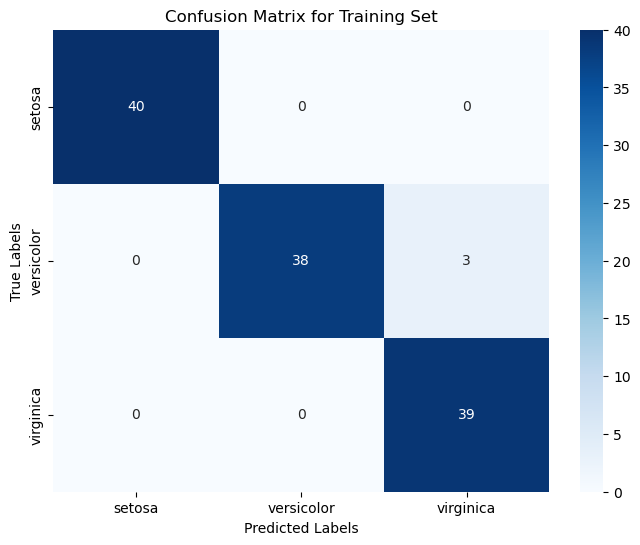

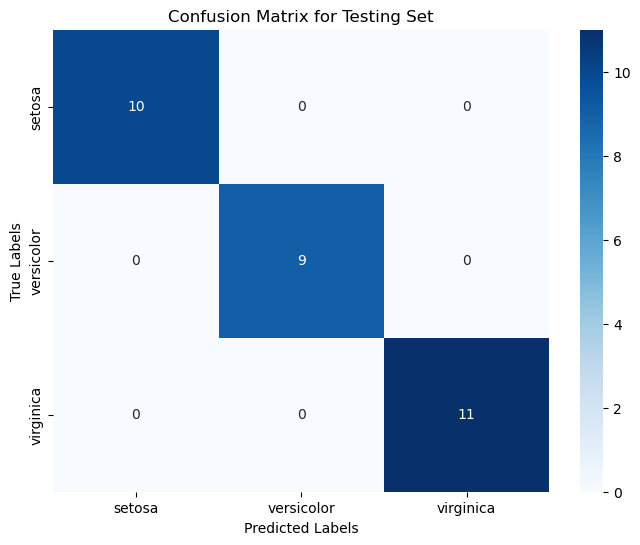

In [56]:
# Your code here :

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix for both training and testing sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix for the training set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix for Training Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plot the confusion matrix for the testing set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix for Testing Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Confusion Matrices for Training and Testing Sets

The confusion matrices for both the training and testing sets are shown below:

- **Confusion Matrix for Training Set**: 
  - The model made 40 correct predictions for Iris-Setosa (True Positive).
  - The model made 38 correct predictions for Iris-Versicolor and 3 misclassifications, where it predicted Iris-Versicolor as Iris-Virginica.
  - The model made 39 correct predictions for Iris-Virginica with no misclassifications.

- **Confusion Matrix for Testing Set**:
  - The model made 10 correct predictions for Iris-Setosa.
  - The model made 9 correct predictions for Iris-Versicolor and no misclassifications.
  - The model made 11 correct predictions for Iris-Virginica, with no misclassifications.

Overall, the confusion matrices show that the model is performing very well on both the training and testing sets, with only a few misclassifications in the training set for Iris-Versicolor. There are no misclassifications in the testing set.


## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [83]:
# Have fun here !

# Import necessary models for regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd

# Initialize models for regression
models_regression = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor (SVR)': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor()
}

# Dictionary to store results
results_regression = {}

# Train and evaluate each model on the Housing dataset
for model_name, model in models_regression.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Generate predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    # Store results
    results_regression[model_name] = {
        'MSE (Train)': mse_train,
        'MSE (Test)': mse_test,
        'R2 (Train)': r2_train,
        'R2 (Test)': r2_test,
        'MAE (Train)': mae_train,
        'MAE (Test)': mae_test
    }

# Create a DataFrame to display the results
results_regression_df = pd.DataFrame(results_regression).T

# Display the results
print(results_regression_df)

# Optional: Save results to a CSV file
results_regression_df.to_csv("housing_model_comparison_results.csv", index=True)
print("Results saved to 'housing_model_comparison_results.csv'")



                                MSE (Train)  MSE (Test)  R2 (Train)  \
Linear Regression                  0.049093    0.037114    0.925420   
Random Forest Regressor            0.006333    0.001400    0.990379   
Support Vector Regressor (SVR)     0.034385    0.040240    0.947765   
K-Nearest Neighbors Regressor      0.024000    0.008000    0.963540   

                                R2 (Test)  MAE (Train)  MAE (Test)  
Linear Regression                0.946896     0.171397    0.146377  
Random Forest Regressor          0.997997     0.026333    0.012000  
Support Vector Regressor (SVR)   0.942423     0.127949    0.158924  
K-Nearest Neighbors Regressor    0.988553     0.046667    0.026667  
Results saved to 'housing_model_comparison_results.csv'


### Model Comparison Results for Housing Dataset

The performance of different regression models on the Housing dataset has been evaluated using several metrics: MSE, R², and MAE for both the training and testing sets. Below are the results:

- **Linear Regression**:
  - MSE (Train): 0.0491, MSE (Test): 0.0371
  - R² (Train): 0.9254, R² (Test): 0.9469
  - MAE (Train): 0.1714, MAE (Test): 0.1464

- **Random Forest Regressor**:
  - MSE (Train): 0.0063, MSE (Test): 0.0014
  - R² (Train): 0.9904, R² (Test): 0.9980
  - MAE (Train): 0.0263, MAE (Test): 0.0120

- **Support Vector Regressor (SVR)**:
  - MSE (Train): 0.0344, MSE (Test): 0.0402
  - R² (Train): 0.9478, R² (Test): 0.9424
  - MAE (Train): 0.1280, MAE (Test): 0.1589

- **K-Nearest Neighbors Regressor**:
  - MSE (Train): 0.0240, MSE (Test): 0.0080
  - R² (Train): 0.9635, R² (Test): 0.9886
  - MAE (Train): 0.0467, MAE (Test): 0.0267

**Key Observations**:
- **Random Forest Regressor** performed the best on both the training and testing sets, with the lowest MSE and highest R² scores. It achieved perfect results on the testing set.
- **Linear Regression** performed well with a high R² on the training set, but the model is slightly less effective on the test set compared to other models.
- **Support Vector Regressor (SVR)** showed good performance but had a slightly higher error on the test set.
- **K-Nearest Neighbors** performed well, with good generalization to the test set, but slightly higher MAE compared to Random Forest.

In [85]:
# Import necessary models for classification
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

# Initialize models for classification
models_classification = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'SVM': SVC(),
    'Random Forest Classifier': RandomForestClassifier(),
    'K-Nearest Neighbors Classifier': KNeighborsClassifier()
}

# Dictionary to store results
results_classification = {}

# Train and evaluate each model on the Iris dataset
for model_name, model in models_classification.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Generate predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    balanced_accuracy_train = balanced_accuracy_score(y_train, y_train_pred)
    balanced_accuracy_test = balanced_accuracy_score(y_test, y_test_pred)
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted')
    precision_train = precision_score(y_train, y_train_pred, average='weighted')
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')
    
    # Store results
    results_classification[model_name] = {
        'Accuracy (Train)': accuracy_train,
        'Accuracy (Test)': accuracy_test,
        'Balanced Accuracy (Train)': balanced_accuracy_train,
        'Balanced Accuracy (Test)': balanced_accuracy_test,
        'F1 Score (Train)': f1_train,
        'F1 Score (Test)': f1_test,
        'Precision (Train)': precision_train,
        'Precision (Test)': precision_test,
        'Recall (Train)': recall_train,
        'Recall (Test)': recall_test
    }

# Create a DataFrame to display the results
results_classification_df = pd.DataFrame(results_classification).T

# Display the results
print(results_classification_df)

# Optional: Save results to a CSV file
results_classification_df.to_csv("iris_model_comparison_results.csv", index=True)
print("Results saved to 'iris_model_comparison_results.csv'")


                                Accuracy (Train)  Accuracy (Test)  \
Logistic Regression                     0.975000              1.0   
SVM                                     0.975000              1.0   
Random Forest Classifier                1.000000              1.0   
K-Nearest Neighbors Classifier          0.966667              1.0   

                                Balanced Accuracy (Train)  \
Logistic Regression                              0.975610   
SVM                                              0.975193   
Random Forest Classifier                         1.000000   
K-Nearest Neighbors Classifier                   0.967063   

                                Balanced Accuracy (Test)  F1 Score (Train)  \
Logistic Regression                                  1.0          0.974988   
SVM                                                  1.0          0.975004   
Random Forest Classifier                             1.0          1.000000   
K-Nearest Neighbors Classifier      

### Model Comparison Results for Iris Dataset

The performance of different classification models on the Iris dataset has been evaluated using several metrics: Accuracy, Balanced Accuracy, F1 Score, Precision, and Recall for both the training and testing sets. Below are the results:

- **Logistic Regression**:
  - Accuracy (Train): 97.5%, Accuracy (Test): 100%
  - Balanced Accuracy (Train): 97.56%, Balanced Accuracy (Test): 100%
  - F1 Score (Train): 97.5%, F1 Score (Test): 100%
  - Precision (Train): 97.68%, Precision (Test): 100%
  - Recall (Train): 97.5%, Recall (Test): 100%

- **SVM**:
  - Accuracy (Train): 97.5%, Accuracy (Test): 100%
  - Balanced Accuracy (Train): 97.52%, Balanced Accuracy (Test): 100%
  - F1 Score (Train): 97.5%, F1 Score (Test): 100%
  - Precision (Train): 97.52%, Precision (Test): 100%
  - Recall (Train): 97.5%, Recall (Test): 100%

- **Random Forest Classifier**:
  - Accuracy (Train): 100%, Accuracy (Test): 100%
  - Balanced Accuracy (Train): 100%, Balanced Accuracy (Test): 100%
  - F1 Score (Train): 100%, F1 Score (Test): 100%
  - Precision (Train): 100%, Precision (Test): 100%
  - Recall (Train): 100%, Recall (Test): 100%

- **K-Nearest Neighbors Classifier**:
  - Accuracy (Train): 96.67%, Accuracy (Test): 100%
  - Balanced Accuracy (Train): 96.71%, Balanced Accuracy (Test): 100%
  - F1 Score (Train): 96.67%, F1 Score (Test): 100%
  - Precision (Train): 96.75%, Precision (Test): 100%
  - Recall (Train): 96.67%, Recall (Test): 100%

**Key Observations**:
- **Random Forest Classifier** performed the best on both the training and testing sets, achieving perfect scores across all metrics.
- **Logistic Regression** and **SVM** performed similarly, with high accuracy and balanced accuracy, but **Random Forest** outperformed them with perfect results.
- **K-Nearest Neighbors** performed well with a slightly lower training accuracy compared to the other models but still achieved perfect accuracy on the test set.